In [3]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [4]:
from ld_gan import visualize
import numpy as np
import ld_gan
import scipy.misc
from tqdm import tqdm
import ld_gan.utils.utils as ld

# show acc-training-curve

In [ ]:
acc = np.loadtxt("eval_imgs/clf_model/scrub/acc.txt", skiprows=1)

In [ ]:
plt.plot(range(len(acc)), acc)

# load data

In [ ]:
path = "eval_imgs/iscores/xs_111v1_nnscs_trip_f5/E30_sr_25"
fnames = ld_gan.data_proc.data_loader.load_data(path)

  1%|          | 4/530 [01:03<1:56:59, 13.35s/it]

In [7]:
acc.max()

0.92563657407400002

In [10]:
acc[75]

0.917100694444

In [12]:
import torch

In [ ]:
tests

In [13]:
model = torch.load("eval_imgs/clf_model/scrub/cnn_64_075.pth")

RuntimeError: cuda runtime error (10) : invalid device ordinal at torch/csrc/cuda/Module.cpp:87

In [14]:
fname = "eval_imgs/clf_model/scrub/cnn_64_075.pth"
model = ld_gan.utils.model_handler.load_model_with_different_gpu_id(fname)

found gpu mapping:  {'cuda:2': 'cuda:0'}
loaded model 'eval_imgs/clf_model/scrub/cnn_64_075.pth'


# test accuracy of gen imgs

In [4]:
# load model
fname = "eval_imgs/clf_model/scrub/cnn_64_075.pth"
cnn = ld_gan.utils.model_handler.load_model_with_different_gpu_id(fname)

found gpu mapping:  {'cuda:2': 'cuda:0'}
loaded model 'eval_imgs/clf_model/scrub/cnn_64_075.pth'


In [5]:
# load data
path = "projects/XS_111v1_gclf_scs_new.py/incept_imgs/0010/"
fnames = ld.listdir(path)
fnames = fnames[:200]
X = [scipy.misc.imread(fname) for fname in tqdm(fnames)]
X = [scipy.misc.imresize(img, (299, 299)) for img in tqdm(X)]
Y = [int(fname.split("_")[-1].split(".")[0]) for fname in fnames]
X = np.array(X)
Y = np.array(Y)

100%|██████████| 200/200 [00:00<00:00, 496.49it/s]


In [7]:
x_batch = X[0:4]
y_batch = Y[0:4]

In [8]:
x_batch, y_batch = ld_gan.data_proc.transform(x_batch, y_batch)

In [11]:
y_pred = cnn(x_batch)

RuntimeError: cuda runtime error (2) : out of memory at /pytorch/torch/lib/THC/generic/THCStorage.cu:66

In [20]:
path = "/net/hci-storage02/groupfolders/compvis/datasets/CASIA-WebFace/CASIA-WebFace/"

In [23]:
sorted(os.listdir(path))

['0000045',
 '0000099',
 '0000100',
 '0000102',
 '0000103',
 '0000105',
 '0000107',
 '0000108',
 '0000114',
 '0000117',
 '0000119',
 '0000121',
 '0000133',
 '0000137',
 '0000141',
 '0000143',
 '0000144',
 '0000145',
 '0000147',
 '0000156',
 '0000157',
 '0000159',
 '0000166',
 '0000168',
 '0000169',
 '0000170',
 '0000174',
 '0000177',
 '0000183',
 '0000185',
 '0000186',
 '0000188',
 '0000189',
 '0000192',
 '0000195',
 '0000198',
 '0000202',
 '0000204',
 '0000205',
 '0000207',
 '0000208',
 '0000210',
 '0000211',
 '0000212',
 '0000214',
 '0000220',
 '0000225',
 '0000233',
 '0000238',
 '0000240',
 '0000247',
 '0000249',
 '0000254',
 '0000256',
 '0000260',
 '0000262',
 '0000263',
 '0000268',
 '0000270',
 '0000271',
 '0000272',
 '0000275',
 '0000280',
 '0000281',
 '0000282',
 '0000284',
 '0000286',
 '0000287',
 '0000293',
 '0000295',
 '0000296',
 '0000297',
 '0000299',
 '0000301',
 '0000302',
 '0000304',
 '0000307',
 '0000310',
 '0000317',
 '0000318',
 '0000319',
 '0000321',
 '0000324',
 '00

In [7]:
path = "projects/XS_111v1_gclf_scs_new.py/incept_imgs/0010/"

In [8]:
fnames = ld.listdir(path)

In [11]:
X = [scipy.misc.imread(fname) for fname in tqdm(fnames)]

100%|██████████| 50050/50050 [04:08<00:00, 201.57it/s]


In [15]:
Y = [int(fname.split("_")[-1].split(".")[0]) for fname in fnames]

In [22]:
X = np.array(X)
Y = np.array(Y)

<IPython.core.display.Javascript object>


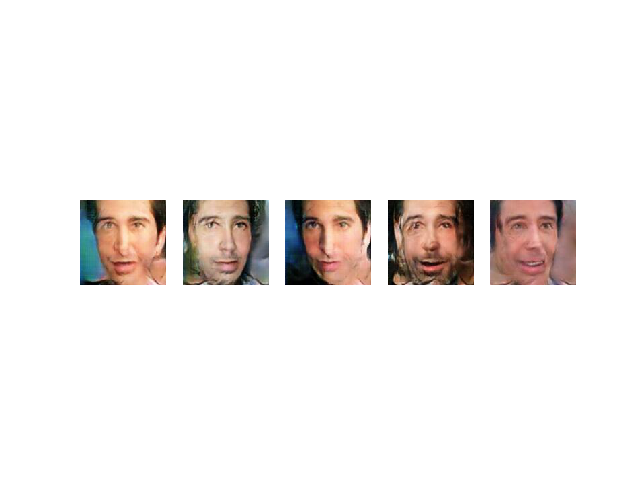

In [28]:
ld.disp(X[Y==127][:5])